In [19]:
import os
os.getcwd()
os.chdir(r"src")
import matplotlib.pyplot as plt
import utils

In [176]:
%reload_ext autoreload
%autoreload 2

In [10]:
# ---- utils libs ----
import datetime
import sys


# --- Import functions from utils.py ---
sys.path.insert(0,'..')
from utils import convertToSequenceParameters, read_pickle_dataset

# --- Import functions from preprocessing.py ---
sys.path.insert(0,'..')
from preprocessing import data_preprocessing

# --- Import functions from visualize.py ---
sys.path.insert(0,'../src/visualization')
from visualize import visualize_load_curve_dataset, visualize_load_curve_resampled, visualize_train_load_curve, visualize_test_load_curve, visualize_test_train_load_curve, visualize_report_preprocessing

# --- Import functions from build_model.py ---
sys.path.insert(0,'../src/models/')
from build_model import model

# --- Import functions from train_model.py ---
sys.path.insert(0,'../src/models/')
from train_model import train

# --- Import functions from eval_model.py ---
sys.path.insert(0,'../src/models/')
from eval_model import plot_train_val_loss, plot_reconstructed_base_load_curve, plot_activity_histogram, plot_activity_distibrution, confusion_matrix, evaluate

# --- Import functions from predict_model.py ---
sys.path.insert(0,'../src/models/')
from predict_model import X_train_predict, X_test_predict, compute_threshold, compute_train_mae_loss, compute_test_mae_loss, plot_train_mae_loss, plot_test_mae_loss, detect_anomaly_sequence, get_anomaly_df, get_df_predict, get_specific_anomaly_sequence, plot_anomaly_sequences, plot_anomaly_data_points

# --- Import functions from postprocessing.py ---
sys.path.insert(0,'..')
from postprocessing import data_postprocessing, plot_postprocessing_anomalies

In [13]:
# --- Define global variable ---
TIME_STEP = datetime.timedelta(minutes=1, seconds=30) # duration of a step in the resample dataset, originally 1 second
DURATION_TIME = datetime.timedelta(minutes=60) # duration of a sequence
OVERLAP_PERIOD_PERCENT = 0.8 # 0.5 <=> 50% overlapping
TIMEFRAMES = [(datetime.time(0,0,0), datetime.time(3,0,0))] # timeframes we consider as unactive
STRATEGY = "off_peak_time" # device, off_peak_time, label 
METHOD = "method_prediction_1" # method to choose for aggregating sequences
print("CONVERTING GLOBAL USER PARAMETERS...\n")
SEQUENCE_LENGTH, OVERLAP_PERIOD = convertToSequenceParameters(TIME_STEP, DURATION_TIME, OVERLAP_PERIOD_PERCENT)
print("\t\tValeur choisie \t Equivalent sequence\nTimestep : \t {}\nDuration :\t {} \t -->  {} \nOverlap :\t {} \t\t -->  {}".format(TIME_STEP, DURATION_TIME, SEQUENCE_LENGTH, OVERLAP_PERIOD_PERCENT, OVERLAP_PERIOD))



CONVERTING GLOBAL USER PARAMETERS...

		Valeur choisie 	 Equivalent sequence
Timestep : 	 0:01:30
Duration :	 1:00:00 	 -->  40 
Overlap :	 0.8 		 -->  32


In [47]:
import pandas as pd
import numpy as np
%reload_ext autoreload
import preprocessing
%autoreload 2
import utils

# <>
Objectif : développer une meilleure stratégie de train/test split


---- Post Processing Parameters ----
TIMEFRAMES =  [(datetime.time(0, 0), datetime.time(3, 0))]
SEQUENCE_LENGTH =  40
RESAMPLE_PERIOD =  0:01:30
OVERLAP_PERIOD =  32
STRATEGY =  off_peak_time


#### Loading and Resampling Data... ####

#### Creating Train and Test set... ####


#### Rescaling Data... ####


#### Creating Test Sequence... ####


Strategy chosen :  off_peak_time

#### Creating Train Sequence... ####





X_train.shape (561, 40, 1)
y_train.shape (561, 40, 3)
X_test.shape (1506, 40, 1)
y_test.shape (1506, 40, 3)


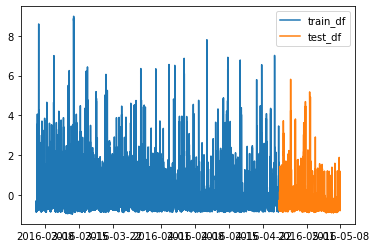

In [205]:
# train test split method = None
train_df, test_df, X_train, y_train, X_test, y_test = data_preprocessing(timeframes = TIMEFRAMES
                                                                         ,sequence_length = SEQUENCE_LENGTH
                                                                         ,overlap_period = OVERLAP_PERIOD
                                                                         ,resample_period = TIME_STEP
                                                                         ,strategy = STRATEGY
                                                                         ,split_method=None)
plt.plot(train_df.index, train_df["mains"], label="train_df")
plt.plot(test_df.index, test_df["mains"], label="test_df")
plt.legend()
print("\n\n")
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)


---- Post Processing Parameters ----
TIMEFRAMES =  [(datetime.time(0, 0), datetime.time(3, 0))]
SEQUENCE_LENGTH =  40
RESAMPLE_PERIOD =  0:01:30
OVERLAP_PERIOD =  32
STRATEGY =  off_peak_time


#### Loading and Resampling Data... ####

#### Creating Train and Test set... ####


#### Rescaling Data... ####


#### Creating Test Sequence... ####


Strategy chosen :  off_peak_time

#### Creating Train Sequence... ####


X_train.shape (572, 40, 1)
y_train.shape (572, 40, 3)
X_test.shape (1275, 40, 1)
y_test.shape (1275, 40, 3)


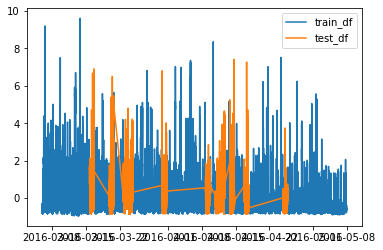

In [206]:
# train test split method = "random_days"
train_df, test_df, X_train, y_train, X_test, y_test = data_preprocessing(timeframes = TIMEFRAMES
                                                                         ,sequence_length = SEQUENCE_LENGTH
                                                                         ,overlap_period = OVERLAP_PERIOD
                                                                         ,resample_period = TIME_STEP
                                                                         ,strategy = STRATEGY
                                                                         ,split_method="random_days")
plt.plot(train_df.index, train_df["mains"], label="train_df")
plt.plot(test_df.index, test_df["mains"], label="test_df")
plt.legend()
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

In [211]:
visualize_train_load_curve(train_df, STRATEGY)
visualize_test_load_curve(test_df, STRATEGY)
visualize_test_train_load_curve(train_df, test_df, STRATEGY)


 power mean train load curve 8.543464430074581e-17

 power mean test load curve 0.051223142298956366


LOAD DATASET...


Load Curve Dataset Resampled each None
                     mains
datetime                  
2016-03-06 00:00:00  473.0
2016-03-06 00:00:01  474.0
2016-03-06 00:00:02  476.0
2016-03-06 00:00:03  476.0
2016-03-06 00:00:04  475.0
2016-03-06 00:00:05  476.0
2016-03-06 00:00:06  478.0
2016-03-06 00:00:07  476.0
2016-03-06 00:00:08  478.0
2016-03-06 00:00:09  477.0
2016-03-06 00:00:10  476.0
2016-03-06 00:00:11  478.0
2016-03-06 00:00:12  476.0
2016-03-06 00:00:13  477.0
2016-03-06 00:00:14  475.0
2016-03-06 00:00:15  479.0
2016-03-06 00:00:16  476.0
2016-03-06 00:00:17  477.0
2016-03-06 00:00:18  479.0
2016-03-06 00:00:19  478.0
2016-03-06 00:00:20  479.0
2016-03-06 00:00:21  478.0
2016-03-06 00:00:22  476.0
2016-03-06 00:00:23  476.0
2016-03-06 00:00:24  477.0
2016-03-06 00:00:25  478.0
2016-03-06 00:00:26  478.0
2016-03-06 00:00:27  477.0
2016-03-06 00:00:28  478.0
2016-03-06 00:00:29  477.0


PLOTING LOAD CURVE RESAMPLED...


CONVERTING GLOBAL USER PARAMETERS...

		Val

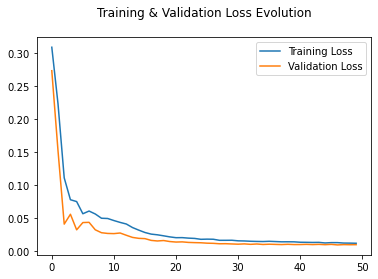

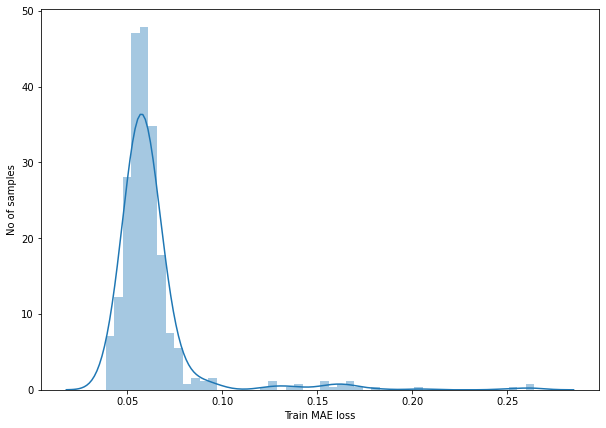

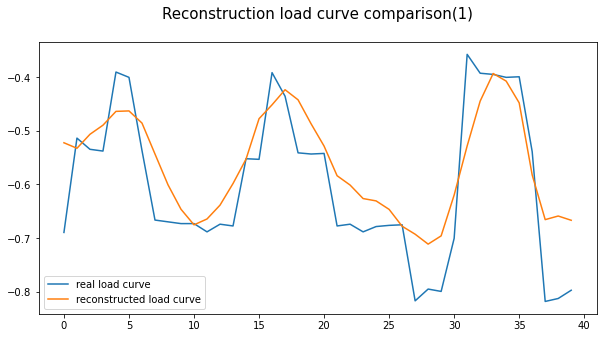

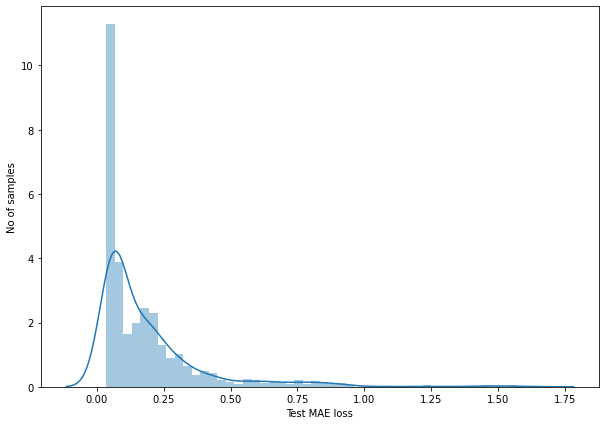

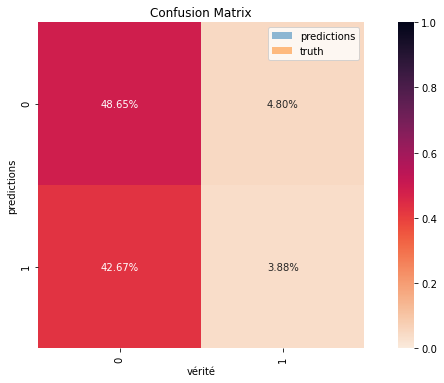

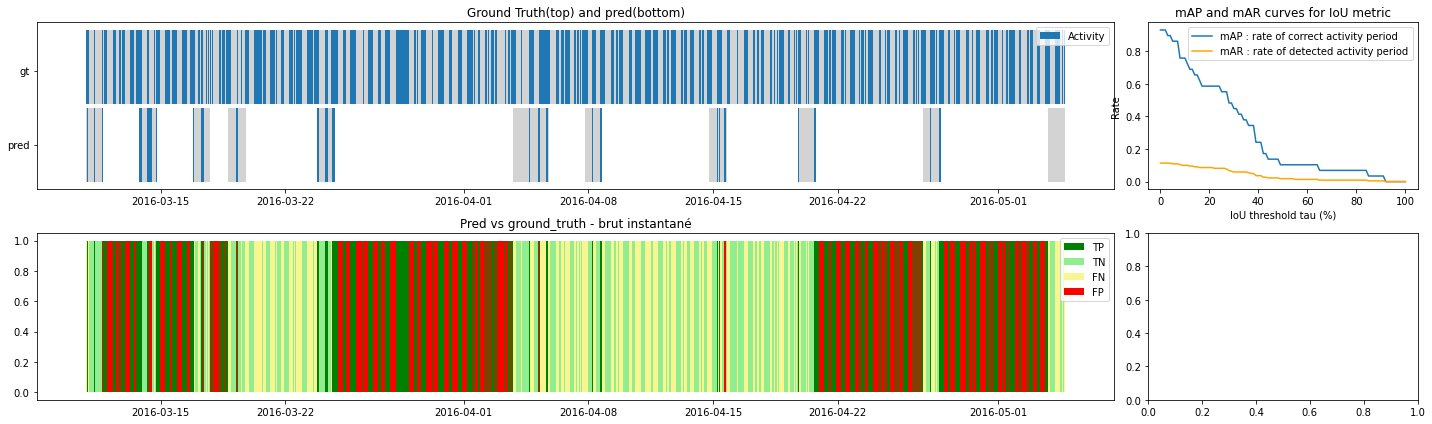

In [329]:
# ---- utils libs ----
import datetime
import sys


# --- Import functions from utils.py ---
sys.path.insert(0,'..')
from utils import convertToSequenceParameters, read_pickle_dataset

# --- Import functions from preprocessing.py ---
sys.path.insert(0,'..')
from preprocessing import data_preprocessing

# --- Import functions from visualize.py ---
sys.path.insert(0,'../src/visualization')
from visualize import visualize_load_curve_dataset, visualize_load_curve_resampled, visualize_train_load_curve, visualize_test_load_curve, visualize_test_train_load_curve, visualize_report_preprocessing

# --- Import functions from build_model.py ---
sys.path.insert(0,'../src/models/')
from build_model import model

# --- Import functions from train_model.py ---
sys.path.insert(0,'../src/models/')
from train_model import train

# --- Import functions from eval_model.py ---
sys.path.insert(0,'../src/models/')
from eval_model import plot_train_val_loss, plot_reconstructed_base_load_curve, plot_activity_histogram, plot_activity_distibrution, confusion_matrix, evaluate

# --- Import functions from predict_model.py ---
sys.path.insert(0,'../src/models/')
from predict_model import X_train_predict, X_test_predict, compute_threshold, compute_train_mae_loss, compute_test_mae_loss, plot_train_mae_loss, plot_test_mae_loss, detect_anomaly_sequence, get_anomaly_df, get_df_predict, get_specific_anomaly_sequence, plot_anomaly_sequences, plot_anomaly_data_points

# --- Import functions from postprocessing.py ---
sys.path.insert(0,'..')
from postprocessing import data_postprocessing, plot_postprocessing_anomalies


# --- Visualize Load Curve Dataset ---
print("LOAD DATASET...\n\n")
df_load_curve = visualize_load_curve_dataset("house1_power_blk2_labels.zip")


# --- Visualize Load Curve ---
print("\n\nPLOTING LOAD CURVE RESAMPLED...\n\n")
load_curve_resampled = visualize_load_curve_resampled("house1_power_blk2_labels.zip","60min")


# --- Define global variable ---
TIME_STEP = datetime.timedelta(minutes=1, seconds=30) # duration of a step in the resample dataset, originally 1 second
DURATION_TIME = datetime.timedelta(minutes=60) # duration of a sequence
OVERLAP_PERIOD_PERCENT = 0.8 # 0.5 <=> 50% overlapping
TIMEFRAMES = [(datetime.time(0,0,0), datetime.time(3,0,0))] # timeframes we consider as unactive
STRATEGY = "off_peak_time" # device, off_peak_time, label 
METHOD = "method_prediction_1" # method to choose for aggregating sequences
SPLIT_METHOD = "random_days" # method for train test split, None or "random_days"

print("CONVERTING GLOBAL USER PARAMETERS...\n")
SEQUENCE_LENGTH, OVERLAP_PERIOD = convertToSequenceParameters(TIME_STEP, DURATION_TIME, OVERLAP_PERIOD_PERCENT)
print("\t\tValeur choisie \t Equivalent sequence\nTimestep : \t {}\nDuration :\t {} \t -->  {} \nOverlap :\t {} \t\t -->  {}".format(TIME_STEP, DURATION_TIME, SEQUENCE_LENGTH, OVERLAP_PERIOD_PERCENT, OVERLAP_PERIOD))


# --- Pre Processing ---
print("STARTING PREPROCESSING...\n")
train_df, test_df, X_train, y_train, X_test, y_test = data_preprocessing(timeframes = TIMEFRAMES
                                                                         ,sequence_length = SEQUENCE_LENGTH
                                                                         ,overlap_period = OVERLAP_PERIOD
                                                                         ,resample_period = TIME_STEP
                                                                         ,strategy = STRATEGY
                                                                         ,split_method=SPLIT_METHOD)

print("PRINTING PREPROCESSING REPORT...\n")
report_classification = visualize_report_preprocessing(X_train, y_train, X_test, y_test
                                                       ,TIMEFRAMES
                                                       ,SEQUENCE_LENGTH
                                                       ,OVERLAP_PERIOD
                                                       ,TIME_STEP
                                                       ,STRATEGY)
                                                                                                                         

print("PLOTING TRAIN LOAD CURVE (base load curve)(" + STRATEGY + ")...")
visualize_train_load_curve(train_df, STRATEGY)

print("PLOTING TEST LOAD CURVE (" + STRATEGY + ")...")
visualize_test_load_curve(test_df, STRATEGY)

print("PLOTING TRAIN TEST LOAD CURVE (" + STRATEGY + ")...")
visualize_test_train_load_curve(train_df, test_df, STRATEGY)

# --- Build Model ---
print("\n\nBUILDING MODEL...")
model = model(X_train)

# --- Train Model ---
print("\n\nTRAININ MODEL...")
history = train(model, X_train)

# --- Evaluation Model ---
print("\n\nPLOTING TRAIN AND VALIDATION LOSS...")
plot_train_val_loss(history)


###### X_train prediction ######
# --- Prediction Model on X_train ---
print("\n\nMAKING PREDICTION FOR X_train...")
X_train_pred = X_train_predict(model, X_train)

# --- Compute train mae loss
print("\n\nCOMPUTING TRAIN MAE LOSS...")
train_mae_loss = compute_train_mae_loss(X_train_pred, X_train)

# --- Compute Threshold ---
print("\n\nCOMPUTING THRESHOLD...")
threshold = compute_threshold(X_train_pred, X_train)

# --- Plot train mae loss ---
print("\n\nPLOTING TRAIN MAE LOSS...")
plot_train_mae_loss(X_train_pred, X_train)



# --- Plot reconstructed base load curve
print("\n\nPLOTING RECONSTRUCTED BASE LOAD CURVE...")
plot_reconstructed_base_load_curve(X_train, X_train_pred)


###### X_test prediction ######
# --- Prediction Model on X_test ---
print("\n\nMAKING PREDICTION FOR X_test...")
X_test_pred = X_test_predict(model, X_test)

# --- Compute test mae loss
print("\n\nCOMPUTING TEST MAE LOSS...")
test_mae_loss = compute_test_mae_loss(X_test_pred, X_test)

# --- Plot test mae loss ---
print("\n\nPLOTING TEST MAE LOSS...")
plot_test_mae_loss(X_test_pred, X_test)


# --- Detect anomalies ---
print("\n\nDETECTING ANOMALIES...")
sequences_anomalies_idx, data_anomalies_idx = detect_anomaly_sequence(test_mae_loss, threshold, SEQUENCE_LENGTH, y_test)

# --- Build anomaly dataframe ---
print("\n\nBUILDING ANOMALY DATAFRAME...")
df_anomalies = get_anomaly_df(data_anomalies_idx, test_df)
print(df_anomalies)

# --- Build prediction dataframe ---
print("\n\nBUILDING PREDICTION DATAFRAME...")
df_predict = get_df_predict(test_df, df_anomalies)

# --- Visualize Specific sequence anomalies ---
print("\n\nEXPORTING SPECIFIC SEQUENCE ANOMALIES...")
get_specific_anomaly_sequence(0, sequences_anomalies_idx, y_test)

# --- Plot anomaly sequences ---
print("\n\nPLOTING ANOMALY SEQUENCE...")
plot_anomaly_sequences(test_df, data_anomalies_idx)

# --- Plot anomaly data points ---
print("\n\nPLOTING ANOMALY DATA POINTS...")
plot_anomaly_data_points(test_df, data_anomalies_idx, threshold)

# --- Plot activity histogram ---
print("\n\nPLOTING ACTIVITY HISTOGRAM...")
plot_activity_histogram(df_anomalies, test_df)

# --- Plot activity distribution ---
print("\n\nPLOTING ACTIVITY DISTRIBUTION...")
plot_activity_distibrution(df_predict)

# --- Plot confusion matrix ---
print("\n\nPLOTING CONFUSION MATRIX...")
confusion_matrix(test_df, df_predict)

# --- Post Processing --- #
print("\n\nPOSTPROCESSING...")
data_postprocessing(y_test, SEQUENCE_LENGTH, sequences_anomalies_idx, True)

# --- Load data prediction post processing --- #
print("\n\nLOADING DATA PREDICTION POSTPROCESSING...")
data_prediction_post_process = read_pickle_dataset("data_prediction.pkl")

# --- Plot detected anoamlies after post processing --- #
print("\n\nPLOTING DETECTED ANOMALIES (AFTER POST PROCESSING)...")
plot_postprocessing_anomalies(data_prediction_post_process, test_df)

# --- PLot direct and IoU threshold
print("\n\nPLOTING EVALUATION PLOT (DIRECT AND IoU THRESHOLD)...")


y_pred = data_prediction_post_process[["Timestamp", METHOD]]
y_true = df_load_curve[(df_load_curve.index>=y_pred["Timestamp"].min())&(df_load_curve.index<=y_pred["Timestamp"].max())].reset_index()[["datetime", "activity"]]

IoU_thresholds, MAP, MAR = evaluate(y_pred, y_true, display_plots=True)

# DEGUB

# Correct evaluate

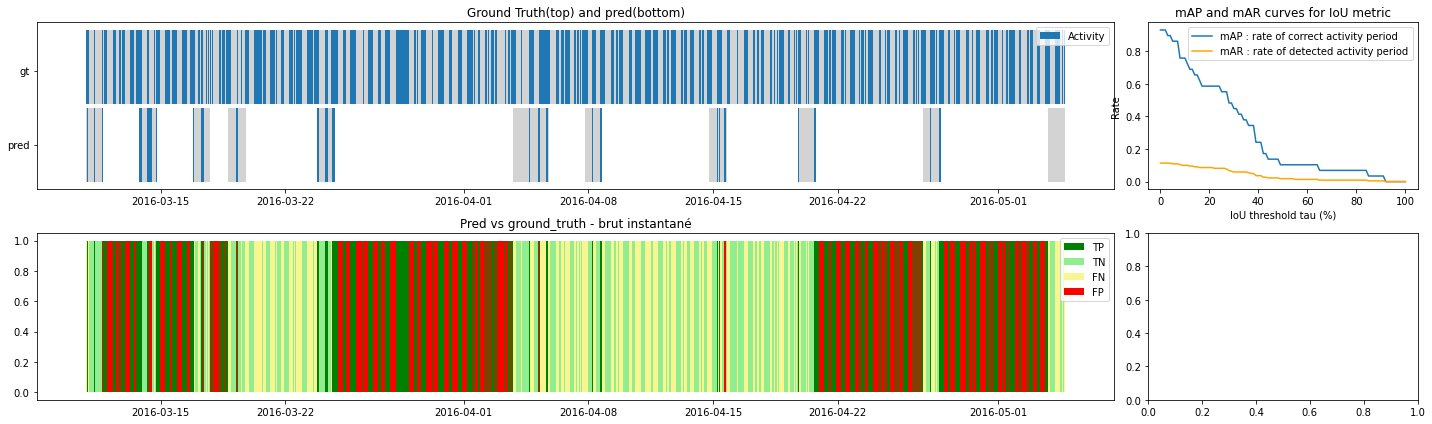

In [338]:
y_pred = data_prediction_post_process[["Timestamp", METHOD]]
y_true = df_load_curve[(df_load_curve.index>=y_pred["Timestamp"].min())&(df_load_curve.index<=y_pred["Timestamp"].max())].reset_index()[["datetime", "activity"]]

IoU_thresholds, MAP, MAR = evaluate(y_pred, y_true, display_plots=True)

In [339]:
y_pred

,Timestamp,method_prediction_1
0,2016-03-10 19:00:00,1
1,2016-03-10 19:01:30,1
2,2016-03-10 19:03:00,1
3,2016-03-10 19:04:30,1
4,2016-03-10 19:06:00,1
...,...,...
11427,2016-05-04 18:40:30,0
11428,2016-05-04 18:42:00,0
11429,2016-05-04 18:43:30,0
11430,2016-05-04 18:45:00,0


In [340]:
y_true

,datetime,activity
0,2016-03-10 19:00:00,1
1,2016-03-10 19:00:01,1
2,2016-03-10 19:00:02,1
3,2016-03-10 19:00:03,1
4,2016-03-10 19:00:04,1
...,...,...
4751186,2016-05-04 18:46:26,1
4751187,2016-05-04 18:46:27,1
4751188,2016-05-04 18:46:28,1
4751189,2016-05-04 18:46:29,1


               datetime  activity
0   2016-03-10 19:00:00         1
90  2016-03-10 19:01:30         1
180 2016-03-10 19:03:00         1
270 2016-03-10 19:04:30         1
360 2016-03-10 19:06:00         1
datetime
0         2016-03-10 19:00:00
90        2016-03-10 19:01:30
180       2016-03-10 19:03:00
270       2016-03-10 19:04:30
360       2016-03-10 19:06:00
                  ...        
4750830   2016-05-04 18:40:30
4750920   2016-05-04 18:42:00
4751010   2016-05-04 18:43:30
4751100   2016-05-04 18:45:00
4751190   2016-05-04 18:46:30
Name: datetime, Length: 11432, dtype: datetime64[ns]
            Timestamp  method_prediction_1
0 2016-03-10 19:00:00                    1
1 2016-03-10 19:01:30                    1
2 2016-03-10 19:03:00                    1
3 2016-03-10 19:04:30                    1
4 2016-03-10 19:06:00                    1
Timestamp
0       2016-03-10 19:00:00
1       2016-03-10 19:01:30
2       2016-03-10 19:03:00
3       2016-03-10 19:04:30
4       2016-03-10 19:06

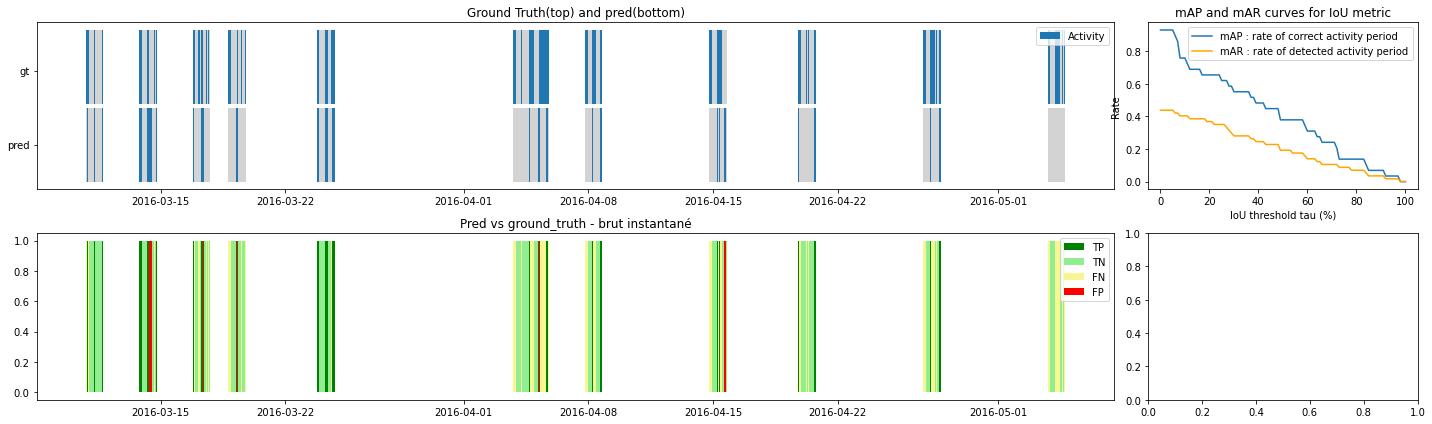

In [351]:
IoU_thresholds, MAP, MAR = evaluate(y_pred, y_true[y_true["datetime"].isin(y_pred["Timestamp"])], display_plots=True)

In [350]:
df_gt_period = utils.detect_stages(y_true[y_true["datetime"].isin(y_pred["Timestamp"])], "activity", y_true.columns[0])

               datetime  activity
0   2016-03-10 19:00:00         1
90  2016-03-10 19:01:30         1
180 2016-03-10 19:03:00         1
270 2016-03-10 19:04:30         1
360 2016-03-10 19:06:00         1
datetime
0         2016-03-10 19:00:00
90        2016-03-10 19:01:30
180       2016-03-10 19:03:00
270       2016-03-10 19:04:30
360       2016-03-10 19:06:00
                  ...        
4750830   2016-05-04 18:40:30
4750920   2016-05-04 18:42:00
4751010   2016-05-04 18:43:30
4751100   2016-05-04 18:45:00
4751190   2016-05-04 18:46:30
Name: datetime, Length: 11432, dtype: datetime64[ns]


In [345]:
y_true[y_true["datetime"].isin(y_pred["Timestamp"])].dtypes

datetime    datetime64[ns]
activity             int64
dtype: object